In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import curve_fit
rcParams['font.size'] = 14
rcParams['text.usetex'] = True

# Load data

In [73]:
# LERs = np.load('Data/LER_tree_1dIsing.npy')
# beta = np.load('Data/beta_tree_1dIsing.npy')
LERs = np.load('Data/LER_2_trees.npy')
beta = np.load('Data/beta_2_trees.npy')

In [25]:
n_l = np.array([2,12,22,32,42,52,62])

In [92]:
r = np.array([2,3,4,5])
z = 3
n_l = 1+z*((z-1)**(r-1)-1)//(z-2)

# Plot data

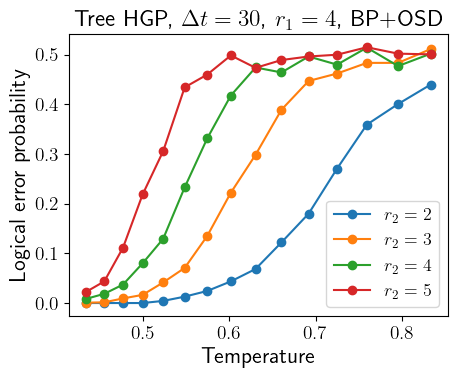

In [105]:
plt.figure(figsize=[4.8,4])
for i in range(len(LERs)):
    plt.plot(1/beta, LERs[i], 'o-', label=r'$r_2 = {}$'.format(r[i]))
plt.xlabel('Temperature', fontsize=16)
plt.ylabel('Logical error probability', fontsize=16)
plt.title(r'Tree HGP, $\Delta t=30$, $r_1=4$, BP+OSD')
plt.legend(fontsize=13)
plt.tight_layout()
# plt.savefig('Plots/tree_HGP_BPOSD.pdf')

# Interpolate at LER = 0.25

In [81]:
beta_c = np.zeros(len(n_l))
for i in range(0,len(n_l)):
    ind = np.where(LERs[i] < 0.25)[0][0]
    slope = (LERs[i,ind]-LERs[i,ind-1]) / (beta[ind]-beta[ind-1])
    beta_c[i] = (0.25-LERs[i,ind]) / slope + beta[ind]
print(beta_c)

[1.39450068 1.6338293  1.8087358  1.96793647]


In [85]:
def f(x, a, b):
    return a*x + b
    
par, cov = curve_fit(f, np.log(n_l)[0:], beta_c[0:], p0=[2,1])

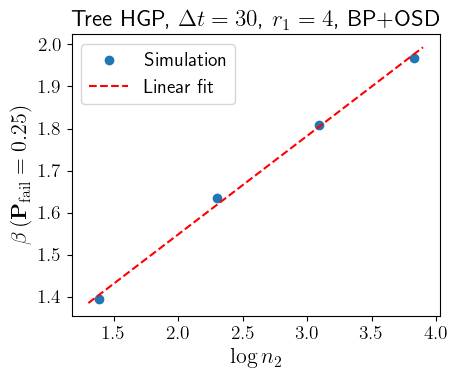

In [102]:
plt.figure(figsize=[4.8,4])
plt.scatter(np.log(n_l)[0:], beta_c[0:], label='Simulation')
plt.plot([1.3, 3.9], [f(1.3,par[0],par[1]), f(3.9,par[0],par[1])], 'r--', label='Linear fit')
plt.xlabel(r'$\log n_2$', fontsize=16)
plt.ylabel(r'$\beta\left(\mathbf{P}_\mathrm{fail} = 0.25\right)$', fontsize=16)
plt.title(r'Tree HGP, $\Delta t=30$, $r_1=4$, BP+OSD')
plt.legend()
plt.tight_layout()
# plt.savefig('Plots/tree_HGP_beta_c.pdf')